In [2]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import hippomaps as hm

In [5]:
source_dir = '../../publication-hippomaps/sourcedata/BIDS_HISTO/'
hippunfold_dir = '../../publication-hippomaps/hippunfold/HISTO_v1.3.0_100um/hippunfold/'

subs = ['bbhist', 'bbhist', 'pli3d', '122017', '122017', '152017', '152017']
ses = ''
hemis = ['L','R','L','R','L','L','R','L','R']
labels = 'hipp'
den='unfoldiso'

# get expected number of vertices and their indices
nV,iV = hm.config.get_nVertices(labels,den) 

features = ['thickness', 'gyrification', 'curvature']
morph_dat_hist = np.zeros([nV,len(subs),len(features)])*np.nan
d=[]
for f,feature in enumerate(features):
    for s,sub in enumerate(subs):
        d = nib.load(f'{hippunfold_dir}/sub-{sub}/surf/sub-{sub}_hemi-{hemis[s]}_space-corobl'\
                     f'_den-{den}_label-{labels}_{feature}.shape.gii')
        morph_dat_hist[:,s,f] = d.darrays[0].data
        if feature=='curvature':
            morph_dat_hist[:,s,f] = np.tanh(morph_dat_hist[:,s,f])
            if hemis[s]=="R":
                morph_dat_hist[:,s,f] = -morph_dat_hist[:,s,f]

/export03/data/opt/venv/lib/python3.8/site-packages/brainspace/plotting/base.py:287: UserWarning: Interactive mode requires 'panel'. Setting 'interactive=False'
  warnings.warn("Interactive mode requires 'panel'. "


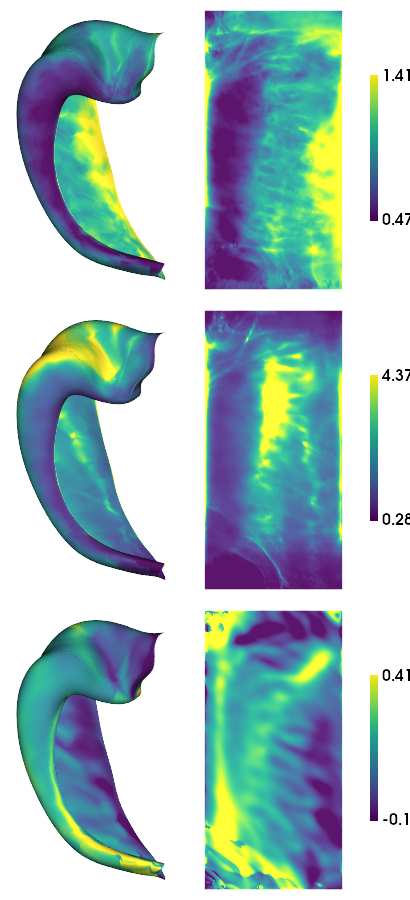

In [7]:
hm.plotting.surfplot_canonical_foldunfold(np.mean(morph_dat_hist,axis=1), labels=labels, hemis=['L'], unfoldAPrescale=True, den=den, color_bar='right', share='row', tighten_cwindow=True, embed_nb=True)

In [12]:
nV

7262

In [13]:
## micapipe_dir = '../sourcedata/Supersession_PNI'
hippunfold_dir = '../../publication-hippomaps/hippunfold/PNI_v1.3.0_super/hippunfold'

subs = ['PNC002', 'PNC003', 'PNC006', 'PNC007', 'PNC009', 'PNC010', 'PNC015', 'PNC016', 'PNC018', 'PNC019']
ses = ''
hemis = ['L','R']
labels = ['hipp']#,'dentate'] 
den = '0p5mm'

# get expected number of vertices and their indices
nV,iV = hm.config.get_nVertices(labels,den) 

morph_dat_MRI7T = np.zeros([nV,2,len(subs),len(features)])*np.nan
d=[]
for h,hemi in enumerate(hemis):
    for l,label in enumerate(labels):
        for f,feature in enumerate(features):
            for s,sub in enumerate(subs):
                try:
                    d = nib.load(f'{hippunfold_dir}/sub-{sub}/surf/sub-{sub}_hemi-{hemi}_space-T1w'\
                                 f'_den-{den}_label-{label}_{feature}.shape.gii')
                    morph_dat_MRI7T[iV[l],h,s,f] = d.darrays[0].data
                except:
                    print(f'{sub} {feature} {label} not found')
morph_dat_MRI7T[:,0,:,2] = -morph_dat_MRI7T[:,0,:,2]

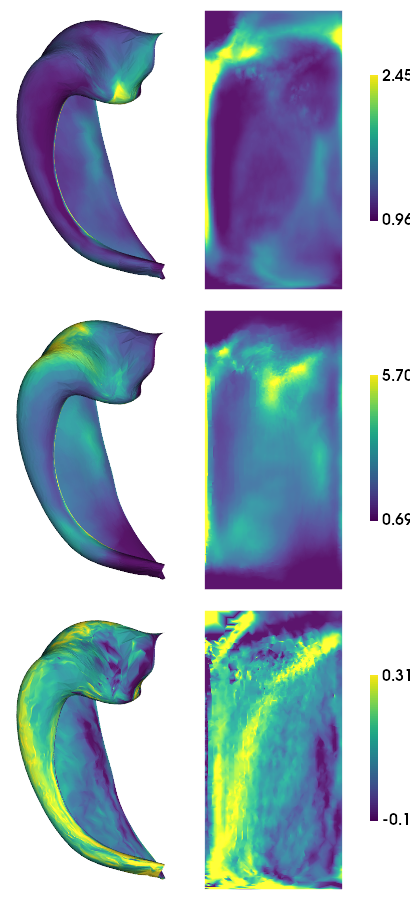

In [14]:
hm.plotting.surfplot_canonical_foldunfold(np.nanmean(morph_dat_MRI7T,axis=(1,2)), hemis=['L'], labels=labels, unfoldAPrescale=True, den=den, color_bar='right', share='row', tighten_cwindow=True, embed_nb=True)

In [16]:
micapipe_dir = '../../publication-hippomaps/sourcedata/Micapipe_MICs'
hippunfold_dir = '../../publication-hippomaps/hippunfold/MICs_v1.3.0/hippunfold'

subs = ['HC048', 'HC043', 'HC087', 'HC037', 'HC055', 'HC100', 'HC036', 'HC017', 'HC088', 'HC040', 'HC058', 'HC076', 'HC090', 'HC059', 'HC101', 'HC063', 'HC094', 'HC024', 'HC050',
 'HC080', 'HC013', 'HC026', 'HC001', 'HC084', 'HC105', 'HC083', 'HC042', 'HC014', 'HC033', 'HC081', 'HC106', 'HC108', 'HC095', 'HC002', 'HC102', 'HC028', 'HC020', 'HC049',
 'HC007', 'HC023', 'HC065', 'HC025', 'HC056', 'HC003', 'HC015', 'HC077', 'HC067', 'HC072', 'HC109', 'HC086', 'HC089', 'HC091', 'HC031', 'HC039', 'HC112', 'HC068', 'HC034',
 'HC032', 'HC060', 'HC047', 'HC103', 'HC046', 'HC009', 'HC097', 'HC116', 'HC053', 'HC079', 'HC029', 'HC075', 'HC078', 'HC057', 'HC018', 'HC074', 'HC064',
 'HC096', 'HC010', 'HC038', 'HC093', 'HC082', 'HC092', 'HC027', 'HC019', 'HC005', 'HC008', 'HC011', 'HC044', 'HC030', 'HC035', 'HC085', 'HC069', 'HC041', 'HC012', 'HC054', 'HC022', 'HC016', 'HC099',
 'HC073', 'HC052', 'HC045']
ses = 'ses-01'
hemis = ['L','R']
labels = ['hipp']#,'dentate'] 
den = '0p5mm'

# get expected number of vertices and their indices
nV,iV = hm.config.get_nVertices(labels,den) 

morph_dat_MRI3T = np.zeros([nV,2,len(subs),len(features)])*np.nan
d=[]
for h,hemi in enumerate(hemis):
    for l,label in enumerate(labels):
        for f,feature in enumerate(features):
            for s,sub in enumerate(subs):
                try:
                    d = nib.load(f'{hippunfold_dir}/sub-{sub}/{ses}/surf/sub-{sub}_{ses}_hemi-{hemi}_space-T1w'\
                                 f'_den-{den}_label-{label}_{feature}.shape.gii')
                    morph_dat_MRI3T[iV[l],h,s,f] = d.darrays[0].data
                except:
                    print(f'{sub} {feature} {label} not found')
morph_dat_MRI3T[:,0,:,2] = -morph_dat_MRI3T[:,0,:,2]

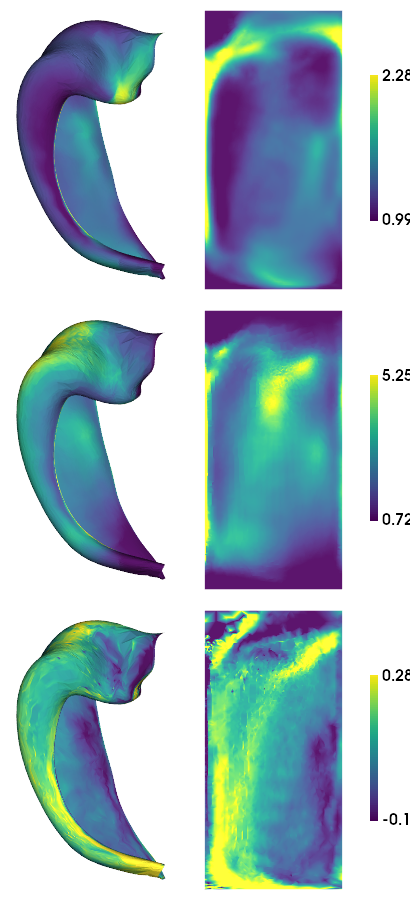

In [18]:
hm.plotting.surfplot_canonical_foldunfold(np.nanmean(morph_dat_MRI3T,axis=(1,2)), hemis=['L'], labels=labels, unfoldAPrescale=True, den=den, color_bar='right', share='row', tighten_cwindow=True, embed_nb=True)

In [9]:
# save 2D map
for f,feature in enumerate(features):
    for h,hemi in enumerate(hemis):
        cdat = np.nanmean(morph_dat_MRI3T[iV[0],h,:,f],axis=1).flatten()
        data_array = nib.gifti.GiftiDataArray(data=cdat)
        image = nib.gifti.GiftiImage()
        image.add_gifti_data_array(data_array)
        nib.save(image, f'../maps/HippoMaps-initializationMaps/Dataset-MICs/MRI-3T-{feature}_average-99_hemi-{hemi}_den-0p5mm_label-hipp.shape.gii')

In [10]:
# save 2D map
for f,feature in enumerate(features):
    cdat = np.nanmean(morph_dat_MRI7T[iV[0],:,:,f],axis=(1,2)).flatten()
    data_array = nib.gifti.GiftiDataArray(data=cdat)
    image = nib.gifti.GiftiImage()
    image.add_gifti_data_array(data_array)
    nib.save(image, f'../maps/HippoMaps-initializationMaps/Dataset-PNI/MRI-7T-{feature}_average-20_hemi-mix_den-0p5mm_label-hipp.shape.gii')

In [11]:
for f,feature in enumerate(features):
    cdat = np.nanmean(morph_dat_hist[:,:,f],axis=1).flatten()
    data_array = nib.gifti.GiftiDataArray(data=cdat)
    image = nib.gifti.GiftiImage()
    image.add_gifti_data_array(data_array)
    nib.save(image, f'../maps/HippoMaps-initializationMaps/Dataset-Mixed/histology-{feature}_average-7_hemi-mix_den-unfoldiso_label-hipp.shape.gii')